# Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import soundfile as sf
import IPython.display as ipd
import numpy as np
from random import randint, shuffle
from sklearn.preprocessing import normalize
from tqdm import tqdm

# Load audio file

In [3]:
data, samplerate = sf.read('/home/raquib/Desktop/workspaces/mep-classification/Audio/Notebook/audio/Cropped/7.flac')
print('shape: ' + str(data.shape))
print('sample rate: ' + str(samplerate))
# data = data[200:4376]

shape: (1046,)
sample rate: 44100


# Display waveform

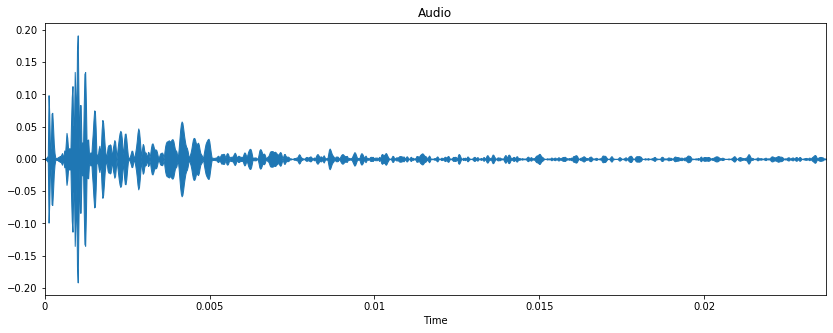

In [4]:
plt.figure(figsize=(14, 5))
plt.title("Audio")
librosa.display.waveplot(data, sr=samplerate)

# Display spectogram

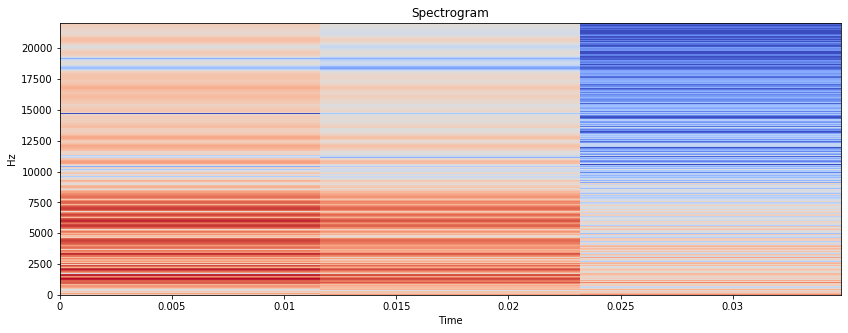

In [5]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
plt.title("Spectrogram")
librosa.display.specshow(Xdb, sr=samplerate, x_axis='time', y_axis='hz')

# Play the audio

In [6]:
ipd.Audio(data, rate=samplerate)

# Function to plot FFT

In [16]:
def plot_fft(fft, name='FFT', x_limit=data.shape[0]):
    plt.figure(figsize=(12, 5))
    plt.plot(fft)
    plt.title(name)
    plt.xlim(0, x_limit)

# Plot FFT

(524,)


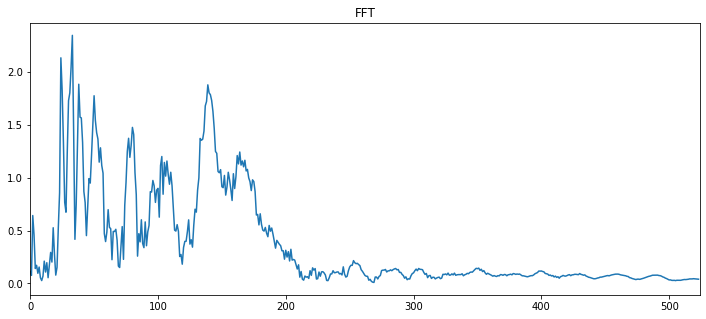

In [12]:
data_fft = np.fft.rfft(data)
print(data_fft.shape)
frequencies = np.abs(data_fft)
plot_fft(frequencies, "FFT", frequencies.shape[0])

# Inverse transformed waveform

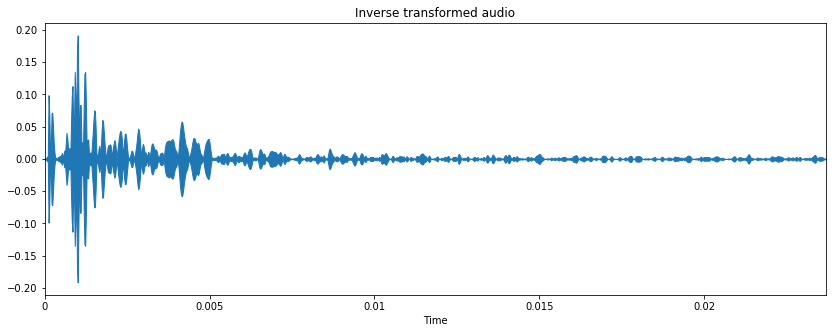

In [13]:
plt.figure(figsize=(14, 5))
plt.title("Inverse transformed audio")
librosa.display.waveplot(np.abs(np.fft.irfft(data_fft)), sr=samplerate)

# Inverse transformed audio

In [14]:
ipd.Audio(np.fft.irfft(data_fft), rate=samplerate)

# Randomly phase shift the FFT to generate multiple FFTs

In [15]:
fft_list = []
original_count = 10 # Have 10 FFTs of the original signal in final concatenatated signal.

# Append original signal FFT in the FFT list.
for i in range(original_count):
    fft_list.append([])
    fft_list[i].append(data_fft)

max_fft_count = 500000 # How many FFTs to generate, including the original 10.
max_offset = 10 # There is room for offset of 1127 max.

# Append randomly phase shifted FFTs in the FFT list.
for i in tqdm(range(max_fft_count - original_count)):
    offset = randint(1, max_offset)
    new_fft = data_fft
    for j in range(offset):
        new_fft = np.insert(new_fft, 0, 0)
        new_fft = np.delete(new_fft, -1)
    fft_list.append([])
    fft_list[i+original_count].append(new_fft)

# Shuffle the FFT list.
shuffle(fft_list)
fft_list = np.array(fft_list)

100%|██████████| 499990/499990 [00:42<00:00, 11857.55it/s]


# Plot the first 2 random FFTs

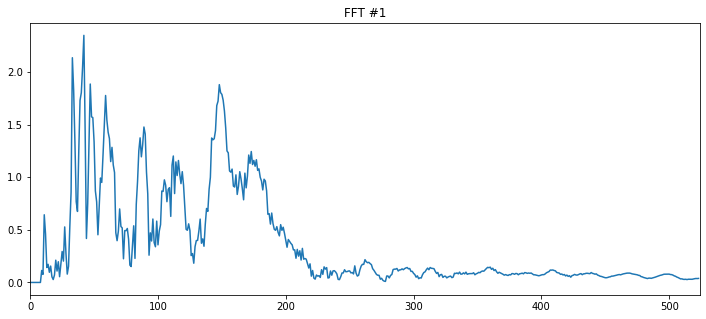

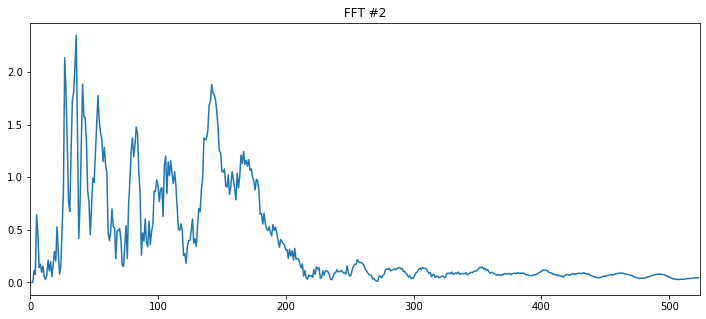

In [17]:
for i in range(2):
    new_fft = fft_list[i].flatten()
    plot_fft(np.abs(new_fft), "FFT #" + str(i + 1), new_fft.shape[0])
    ipd.display(ipd.Audio(np.fft.irfft(new_fft), rate=samplerate))

# Function to add arrays of different lengths

In [18]:
def sum(a, b):
    if len(a) < len(b):
        c = b.copy()
        c[:len(a)] += a
    else:
        c = a.copy()
        c[:len(b)] += b
    return c

# Concatentate all waveforms of FFTs with random phase shifts

In [ ]:
concatenated = np.array([])
max_overlap = int(data.shape[0] * 0.98)
min_overlap = int(max_overlap * 0.90)
for i in range(fft_list.shape[0]):
    new_audio = np.fft.irfft(fft_list[i].flatten())
    zero_length = concatenated.shape[0] - randint(min_overlap, max_overlap)
    if (zero_length < 0): zero_length = 0
    new_audio = np.insert(new_audio, 0, np.zeros(zero_length))
    concatenated = sum(concatenated, new_audio)

## Display the result

In [ ]:
plt.figure(figsize=(14, 5))
plt.title("Concatenated Audio")
librosa.display.waveplot(concatenated, sr=samplerate)
ipd.display(ipd.Audio(concatenated, rate=samplerate))

In [ ]:
ipd.Audio(data, rate=samplerate)

In [ ]:
multiplier = 1/np.abs(max(max(data), min(data)))
print(multiplier)
concatenated = concatenated * multiplier
sf.write('noise-01-20190509.flac', concatenated, samplerate)

In [ ]:
librosa.display.waveplot(data, sr=samplerate)
ipd.display(ipd.Audio(data, rate=samplerate))